In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
relative_path = 'C:/Users/Lydia/Documents/GitHub/Artificial_Intelligence/Projects/X-ray Image Classification/Datasets/'
train_path = relative_path + 'Train'
valid_path = relative_path + 'Valid'
test_path = relative_path + 'Test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [4]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [5]:
x = mobile.layers[-6].output
output = Dense(units=2, activation='softmax')(x)

In [6]:
model = Model(inputs=mobile.input, outputs=output)

In [7]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=100,
            verbose=2
)

Epoch 1/100
522/522 - 112s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 6.3330e-04 - val_accuracy: 1.0000
Epoch 2/100
522/522 - 112s - loss: 2.3546e-04 - accuracy: 1.0000 - val_loss: 1.8871e-04 - val_accuracy: 1.0000
Epoch 3/100
522/522 - 115s - loss: 0.0010 - accuracy: 0.9996 - val_loss: 1.5161e-04 - val_accuracy: 1.0000
Epoch 4/100
522/522 - 115s - loss: 0.0017 - accuracy: 0.9992 - val_loss: 2.0559e-04 - val_accuracy: 1.0000
Epoch 5/100
522/522 - 118s - loss: 1.3352e-04 - accuracy: 1.0000 - val_loss: 2.6738e-04 - val_accuracy: 1.0000
Epoch 6/100
522/522 - 119s - loss: 9.3336e-05 - accuracy: 1.0000 - val_loss: 1.0254e-04 - val_accuracy: 1.0000
Epoch 7/100
522/522 - 119s - loss: 3.2662e-04 - accuracy: 0.9998 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/100
522/522 - 119s - loss: 6.4779e-05 - accuracy: 1.0000 - val_loss: 1.8862e-04 - val_accuracy: 1.0000
Epoch 9/100
522/522 - 118s - loss: 0.0175 - accuracy: 0.9975 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 10/100
522/522 - 12

522/522 - 129s - loss: 8.4963e-04 - accuracy: 0.9998 - val_loss: 9.7208e-04 - val_accuracy: 1.0000
Epoch 77/100
522/522 - 129s - loss: 7.6443e-04 - accuracy: 0.9998 - val_loss: 2.3394e-06 - val_accuracy: 1.0000
Epoch 78/100
522/522 - 130s - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.7071 - val_accuracy: 0.9375
Epoch 79/100
522/522 - 129s - loss: 0.0016 - accuracy: 0.9994 - val_loss: 3.3810e-04 - val_accuracy: 1.0000
Epoch 80/100
522/522 - 129s - loss: 1.6661e-04 - accuracy: 1.0000 - val_loss: 4.1285e-05 - val_accuracy: 1.0000
Epoch 81/100
522/522 - 129s - loss: 4.1747e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 82/100
522/522 - 129s - loss: 5.2817e-05 - accuracy: 1.0000 - val_loss: 2.9291e-04 - val_accuracy: 1.0000
Epoch 83/100
522/522 - 128s - loss: 2.1911e-05 - accuracy: 1.0000 - val_loss: 6.4356e-05 - val_accuracy: 1.0000
Epoch 84/100
522/522 - 128s - loss: 5.6142e-05 - accuracy: 1.0000 - val_loss: 2.0059e-04 - val_accuracy: 1.0000
Epoch 85/100
522/522 

In [12]:
test_labels = test_batches.classes

In [13]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [14]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
test_batches.class_indices

{'Abnormal': 0, 'Normal': 1}

Confusion matrix, without normalization
[[389   1]
 [133 101]]


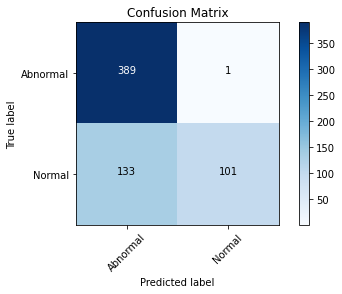

In [17]:
cm_plot_labels = ['Abnormal', 'Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')